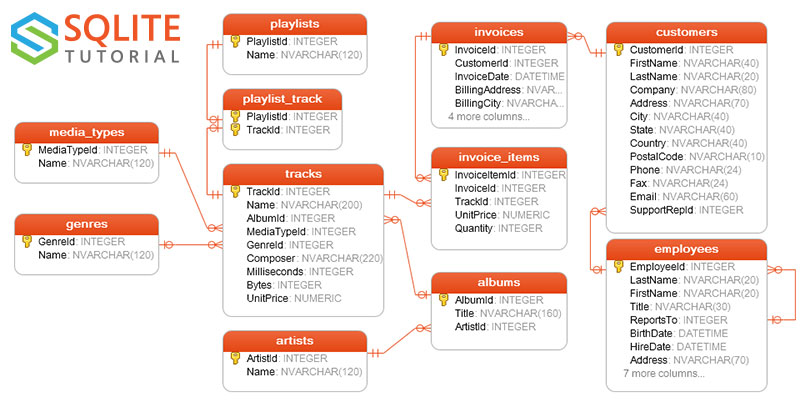

In [1]:
import sqlite3

# Connect to the chinook.db database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

The cursor in SQLite (and many other database systems) is an object used to interact with the database through a connection. It acts like a pointer or a gateway that allows you to execute SQL queries and retrieve data from the database. When you call conn.cursor(), you create this cursor object from an active database connection (conn), and it provides the methods you need to run queries.

Think of the cursor as a "middleman" between your Python program and the database. It allows you to send SQL commands, process the results, and interact with data in a controlled way. By using conn.cursor(), you create this intermediary that can handle all the communication between your code and the database.

- `fetchall()`: Retrieves all rows of a query result as a list of tuples.
- `fetchone()`: Retrieves the next row of the query result, returning a single tuple.
- `fetchmany(size)`: Fetches a specific number of rows from the result.

Parameterized queries: Cursors can be used to safely insert values into a query using parameters, which helps avoid SQL injection.

Managing context: Cursors keep track of their position within the query results, which means they can retrieve data row by row as you iterate over them. one row at a time to avoid memory issues.



In [2]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlists',), ('playlist_track',), ('tracks',), ('sqlite_stat1',)]


In [15]:
cursor.execute("SELECT * FROM artists;")
artists = cursor.fetchall()
for artist in artists[50:]:
    print(artist)
    break
    
len(artists)


(51, 'Queen')


275

In [13]:
cursor.execute("SELECT * FROM albums WHERE ArtistId = 51;")
albums = cursor.fetchall()
for album in albums:
    print(album)

(36, 'Greatest Hits II', 51)
(185, 'Greatest Hits I', 51)
(186, 'News Of The World', 51)


In [16]:
# cursor.execute("INSERT INTO artists (Name) VALUES ('New Artist');")
# conn.commit()

# Parameterized query to insert a new artist
artist_name = "New Artist"
cursor.execute("INSERT INTO artists (Name) VALUES (?);", (artist_name,))
conn.commit()



In [17]:
cursor.execute("SELECT * FROM artists;")
artists = cursor.fetchall()
for artist in artists[-1:]:
    print(artist)
    

(276, 'New Artist')


In [18]:
# cursor.execute("UPDATE artists SET Name = 'Updated Artist' WHERE ArtistId = 276;")
# conn.commit()

try:
    # Parameterized query to update an artist
    artist_name = "Updated Artist"
    artist_id = 276
    cursor.execute("UPDATE artists SET Name = ? WHERE ArtistId = ?;", (artist_name, artist_id))
    conn.commit()
except Exception as e:
    conn.rollback()
    print(f"Exception: {e}")

cursor.execute("SELECT * FROM artists;")
artists = cursor.fetchall()
for artist in artists[-1:]:
    print(artist)

(276, 'Updated Artist')


In [19]:
# cursor.execute("DELETE FROM artists WHERE ArtistId = 276;")
# conn.commit()

try:
    # Parameterized query to delete an artist
    artist_id = 276
    cursor.execute("DELETE FROM artists WHERE ArtistId = ?;", (artist_id,))
    conn.commit()
except Exception as e:
    conn.rollback()
    print(f"Exception: {e}")

In [22]:
# Get the first 10 tracks with the genre 'Rock'
cursor.execute("""
    SELECT tracks.Name, genres.Name 
    FROM tracks 
    JOIN genres ON tracks.GenreId = genres.GenreId 
    WHERE genres.Name = 'Rock';
""")
rock_tracks = cursor.fetchmany(10)
for track in rock_tracks:
    print(track)


('For Those About To Rock (We Salute You)', 'Rock')
('Balls to the Wall', 'Rock')
('Fast As a Shark', 'Rock')
('Restless and Wild', 'Rock')
('Princess of the Dawn', 'Rock')
('Put The Finger On You', 'Rock')
("Let's Get It Up", 'Rock')
('Inject The Venom', 'Rock')
('Snowballed', 'Rock')
('Evil Walks', 'Rock')


In [ ]:
# Using transactions for multiple insertions:

try:
    conn.execute("BEGIN;")
    cursor.execute("INSERT INTO artists (Name) VALUES ('Artist A');")
    cursor.execute("INSERT INTO artists (Name) VALUES ('Artist B');")
    conn.commit()
except Exception as e:
    conn.rollback()  # Undo changes if something goes wrong
    print("Error occurred:", e)


In [ ]:
# Indexing speeds up data retrieval

cursor.execute("CREATE INDEX idx_artist_name ON artists(Name);")
conn.commit()


In [23]:
# Using subqueries

# Example: Find albums released by artists who have more than 5 albums
cursor.execute("""
    SELECT Title FROM albums
    WHERE ArtistId IN (
        SELECT ArtistId FROM albums
        GROUP BY ArtistId
        HAVING COUNT(*) > 5
    );
""")
albums = cursor.fetchall()
for album in albums:
    print(album)


('BBC Sessions [Disc 1] [Live]',)
('Physical Graffiti [Disc 1]',)
('BBC Sessions [Disc 2] [Live]',)
('Coda',)
('Houses Of The Holy',)
('In Through The Out Door',)
('IV',)
('Led Zeppelin I',)
('Led Zeppelin II',)
('Led Zeppelin III',)
('Physical Graffiti [Disc 2]',)
('Presence',)
('The Song Remains The Same (Disc 1)',)
('The Song Remains The Same (Disc 2)',)
('Garage Inc. (Disc 1)',)
('Black Album',)
('Garage Inc. (Disc 2)',)
("Kill 'Em All",)
('Load',)
('Master Of Puppets',)
('ReLoad',)
('Ride The Lightning',)
('St. Anger',)
('...And Justice For All',)
('MK III The Final Concerts [Disc 1]',)
('The Final Concerts (Disc 2)',)
('Come Taste The Band',)
('Deep Purple In Rock',)
('Fireball',)
("Knocking at Your Back Door: The Best Of Deep Purple in the 80's",)
('Machine Head',)
('Purpendicular',)
('Slaves And Masters',)
('Stormbringer',)
('The Battle Rages On',)
('A Matter of Life and Death',)
('A Real Dead One',)
('A Real Live One',)
('Brave New World',)
('Dance Of Death',)
('Fear Of The Da

In [24]:
# Advanced querying - Finding the top 5 artists with the most albums:

cursor.execute("""
    SELECT artists.Name, COUNT(albums.AlbumId) AS album_count
    FROM artists
    JOIN albums ON artists.ArtistId = albums.ArtistId
    GROUP BY artists.Name
    ORDER BY album_count DESC
    LIMIT 5;
""")
top_artists = cursor.fetchall()
for artist in top_artists:
    print(artist)


('Iron Maiden', 21)
('Led Zeppelin', 14)
('Deep Purple', 11)
('U2', 10)
('Metallica', 10)


In [27]:
cursor.execute("SELECT UPPER(Name) FROM artists;")
names = cursor.fetchmany(5)
names

[('AC/DC',),
 ('ACCEPT',),
 ('AEROSMITH',),
 ('ALANIS MORISSETTE',),
 ('ALICE IN CHAINS',)]